In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape", x_train.shape)

x_train.shape (60000, 28, 28)


In [6]:
# Build the model
i = Input(shape=x_train[0].shape) # 28 x 28
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [7]:
# Compile and train
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])
r = model.fit(x_train, y_train,
              validation_data=(x_test, y_test),
              epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 48s 792us/sample - loss: 0.3355 - accuracy: 0.8920 - val_loss: 0.1190 - val_accuracy: 0.9624
Epoch 2/10
60000/60000 [==============================] - 46s 760us/sample - loss: 0.1050 - accuracy: 0.9677 - val_loss: 0.0845 - val_accuracy: 0.9749
Epoch 3/10
60000/60000 [==============================] - 46s 763us/sample - loss: 0.0719 - accuracy: 0.9786 - val_loss: 0.0760 - val_accuracy: 0.9773
Epoch 4/10
60000/60000 [==============================] - 45s 757us/sample - loss: 0.0550 - accuracy: 0.9836 - val_loss: 0.0569 - val_accuracy: 0.9820
Epoch 5/10
60000/60000 [==============================] - 45s 757us/sample - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.0536 - val_accuracy: 0.9840
Epoch 6/10
60000/60000 [==============================] - 46s 761us/sample - loss: 0.0369 - accuracy: 0.9886 - val_loss: 0.0562 - val_accuracy: 0.9840
Epoch 7/10
60000/60000 [====================

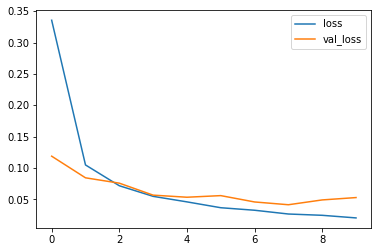

In [8]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

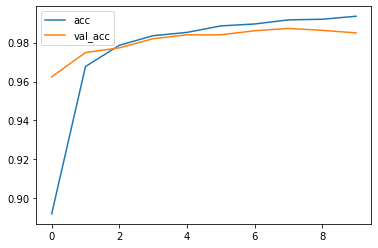

In [9]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 964    0    4    0    1    3    1    2    1    4]
 [   3 1125    3    0    0    1    0    2    1    0]
 [   0    0 1028    0    1    0    1    2    0    0]
 [   0    0    4 1000    0    3    0    3    0    0]
 [   0    0    1    0  958    1    5    2    0   15]
 [   1    0    0    4    0  879    1    2    2    3]
 [   8    2    2    0    4    5  932    0    5    0]
 [   0    1    9    4    1    1    0 1008    0    4]
 [   1    0    2    2    0    4    0    2  954    9]
 [   0    0    0    2    1    2    0    2    0 1002]]


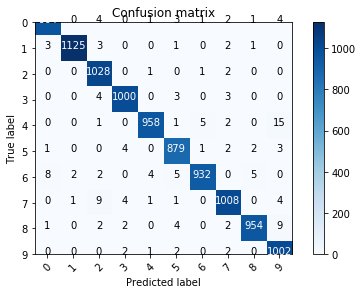

In [10]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion matrix', cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

Text(0.5, 1.0, 'True label: 4, Predicted: 9')

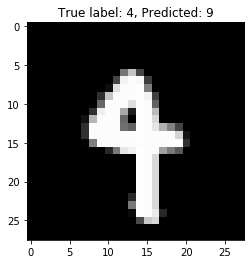

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: {}, Predicted: {}".format(y_test[i], p_test[i]))